# Feature Selection:  Recursive Feature Elimination

Adapted from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

## Overview

### Recursive Feature Elimination (RFE)

**Recursive Feature Elimination (RFE)** is a widely-used feature selection algorithm. It is popular due to its simplicity, ease of configuration, and effectiveness in identifying the most relevant features (columns) in a training dataset for predicting the target variable.

When using RFE, there are two important hyperparameters to consider:

1. **Number of Features to Select**: This determines how many features the algorithm will retain.
2. **Algorithm for Feature Selection**: The choice of algorithm (e.g., linear models, decision trees) used to evaluate feature importance.

While these hyperparameters can be tuned, the performance of RFE is generally robust and not highly sensitive to their configuration. This makes RFE a versatile and reliable tool for feature selection in machine learning workflows.

## Learning Objectives

- Learn how RFE is an efficient approach for eliminating features from a training dataset for feature selection
- Learn how to use RFE for feature selection for classification and regression predictive modeling problems
- Learn how to explore the number of selected features and wrapped algorithm used by the RFE procedure
- Understand how to evaluate different algorithms wrapped by RFE for optimal feature selection

### Tasks to complete

- Implement RFE for classification problems
- Implement RFE for regression problems 
- Explore RFE hyperparameters
- Evaluate different estimator algorithms for RFE
- Analyze selected features

## Prerequisites

- A working Python environment and familiarity with Python
- Basic understanding of machine learning concepts
- Familiarity with pandas and numpy libraries
- Knowledge of basic statistical concepts

## Get Started

To start, we install required packages and import the necessary libraries.

### Install packages

In [1]:
# Install necessary Python packages using pip
# 'matplotlib' for plotting
# 'numpy' for numerical operations
# 'scikit-learn' for machine learning tools

%pip install matplotlib numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [2]:
# Importing necessary libraries and modules for data processing, model building, and evaluation

# Import pyplot from matplotlib for plotting graphs
from matplotlib import pyplot

# Import mean and std from numpy to calculate statistical measures (mean and standard deviation)
from numpy import mean, std

# Import datasets for generating synthetic data
from sklearn.datasets import make_classification, make_regression

# Import ensemble classifiers for building gradient boosting and random forest models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Import Recursive Feature Elimination (RFE) and its cross-validation version (RFECV) for feature selection
from sklearn.feature_selection import RFE, RFECV

# Importing LogisticRegression and Perceptron from scikit-learn's linear_model module
# - LogisticRegression: A linear model used for binary or multi-class classification tasks.
# - Perceptron: A simple linear classifier that is a precursor to neural networks.
from sklearn.linear_model import LogisticRegression, Perceptron

# Import model selection techniques for cross-validation
from sklearn.model_selection import (
    RepeatedKFold,  # Repeated k-fold cross-validation
    RepeatedStratifiedKFold,  # Repeated Stratified k-fold cross-validation for classification tasks
    cross_val_score,  # Function for performing cross-validation
)

# Import Pipeline for building a sequence of processing steps including preprocessing and model fitting
from sklearn.pipeline import Pipeline

# Import decision tree classifiers and regressors for building decision tree-based models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## RFE for Classification

We begin by generating a synthetic binary classification dataset using scikit-learn's **make_classification()** function. This simulated dataset contains 1,000 samples with 10 input features, carefully structured to include five informative predictors that directly influence the target variable and five redundant features that are linear combinations of the informative ones. This controlled configuration allows us to evaluate feature selection methods while knowing ground truth feature importance, with the redundant features serving as an internal control to test a method's ability to filter out uninformative variables.

We then implement Recursive Feature Elimination (RFE) with a DecisionTreeClassifier as the estimator, configured to select the top five most predictive features. Following feature selection, we train a new **DecisionTreeClassifier** exclusively on these optimized features and evaluate performance using rigorous repeated stratified k-fold cross-validation (10 folds with 3 repeats). This evaluation protocol yields robust performance estimates, which we summarize through both the mean classification accuracy and standard deviation across all repetitions, providing insights into both model accuracy and stability. The entire pipeline - from feature selection to final evaluation - is designed to assess whether feature optimization can enhance model performance while maintaining interpretability through a reduced feature set.

In [3]:
# Evaluate Recursive Feature Elimination (RFE) for classification

# Define dataset
# Generate a synthetic classification dataset using make_classification
# - n_samples: Number of samples (rows) in the dataset (1000 in this case).
# - n_features: Total number of features (columns) in the dataset (10 in this case).
# - n_informative: Number of informative (relevant) features that contribute to the target variable (5 in this case).
# - n_redundant: Number of redundant features that are linear combinations of the informative features (5 in this case).
# - random_state: Seed for the random number generator to ensure reproducibility (set to 1).
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Create pipeline
# Initialize RFE with a DecisionTreeClassifier as the estimator
# Set n_features_to_select=5 to keep 5 most important features
rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=5)

# Create the classification model using DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# Create a pipeline that first applies RFE to select important features and then trains the model
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])

# Evaluate model
# Use RepeatedStratifiedKFold for cross-validation, which ensures the distribution of the target variable is maintained across folds.
# 10 splits and 3 repeats will give more reliable results by testing multiple splits of the data.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform cross-validation to evaluate the pipeline's performance, using accuracy as the evaluation metric
n_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report performance
# Calculate and print the mean and standard deviation of the cross-validation accuracy scores
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.033)


The recursive feature elimination (RFE) implementation utilizing a decision tree classifier demonstrates strong performance, achieving 89% classification accuracy when configured to select the top five predictive features. This result suggests that the feature subset identified by the tree-based RFE effectively captures the most discriminative patterns in the data while eliminating redundant or noisy variables. Notably, the decision tree's inherent feature selection capability—combined with RFE's wrapper method—yields a parsimonious model that maintains high predictive power. The 89% accuracy benchmark provides a compelling baseline for comparing alternative feature selection approaches or more complex ensemble methods.

The RFE-model pipeline can serve as a finalized prediction system once feature selection is complete. After fitting the RFE selector and model on the entire training dataset, the pipeline becomes capable of making predictions on new, unseen data via the **predict()** method. This end-to-end approach ensures that the same feature selection process applied during training is automatically applied to future data, maintaining consistency in the model's input structure. For classification tasks, the pipeline outputs class labels directly, while **predict_proba()** can be used if probability estimates are required.

In [4]:
# Make a prediction with an RFE (Recursive Feature Elimination) pipeline

# Define dataset
# Generate a synthetic classification dataset using make_classification
# - n_samples: Number of samples (rows) in the dataset (1000 in this case).
# - n_features: Total number of features (columns) in the dataset (10 in this case).
# - n_informative: Number of informative (relevant) features that contribute to the target variable (5 in this case).
# - n_redundant: Number of redundant features that are linear combinations of the informative features (5 in this case).
# - random_state: Seed for the random number generator to ensure reproducibility (set to 1).
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
)

# Create pipeline
# Set up an RFE (Recursive Feature Elimination) model to select the top 5 features based on a DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=5)

# Create a basic DecisionTreeClassifier as the final model in the pipeline
model = DecisionTreeClassifier(random_state=42)

# Create a pipeline that first applies RFE for feature selection, then uses the DecisionTreeClassifier for prediction
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])

# Fit the model on all available data
# The pipeline is fit using all the data, where RFE first selects important features and then the DecisionTreeClassifier is trained
pipeline.fit(X, y)

# Make a prediction for one example
# Define a new data point with 10 feature values for prediction
data = [
    [
        2.56999479,
        -0.13019997,
        3.16075093,
        -4.35936352,
        -1.61271951,
        -1.39352057,
        -2.48924933,
        -1.93094078,
        3.26130366,
        2.05692145,
    ]
]
# Make a prediction using the fitted pipeline
yhat = pipeline.predict(data)

# Print the predicted class
# Output the predicted class label for the input data point
# Ensure you're extracting the correct element from the array
if yhat.ndim > 0:
    print("Predicted: %.3f" % (yhat.item()))  # Use .item() to get a single element
else:
    print("Predicted: %.3f" % (yhat))  # If it's already a scalar

Predicted: 1.000


The model's prediction of class 1 for the input data point suggests a strong alignment between the observed feature values and the distinguishing patterns characteristic of this class. This classification outcome implies that the input data's attributes—whether in isolation or through their multivariate interactions—resonate with the learned decision boundaries that define class 1 membership in our trained model.

## RFE for Regression

To demonstrate Recursive Feature Elimination (RFE) for regression tasks, we begin by generating a synthetic dataset using scikit-learn’s **make_regression()** function. This dataset will simulate a realistic scenario with 1,000 observations and 10 input features, where only 5 features are truly informative while the remaining 5 serve as redundant variables. This controlled environment allows us to:
* Validate RFE’s ability to identify truly predictive features
* Assess its performance in eliminating noise variables
* Establish a benchmark for feature selection efficacy

The synthetic data’s known ground truth (5 important vs. 5 redundant features) provides an objective evaluation framework before applying RFE to real-world datasets.

In [5]:
# Evaluate RFE for regression

# Define dataset
# Generate a random regression problem.
# 'n_samples=1000' specifies the number of data points.
# 'n_features=10' defines the total number of features.
# 'n_informative=5' sets how many features are informative for the model (the rest are noise).
# 'random_state=1' ensures reproducibility by fixing the random number generator seed.
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# Create pipeline to combine feature selection and model fitting
# 'RFE' (Recursive Feature Elimination) selects the top 'n_features_to_select' features using an estimator.
# 'estimator=DecisionTreeRegressor()' uses a Decision Tree Regressor as the model for feature importance.
# 'n_features_to_select=5' specifies that 5 features should be selected after performing RFE.
rfe = RFE(estimator=DecisionTreeRegressor(random_state=42), n_features_to_select=5)

# Define the model to use after feature selection
# 'DecisionTreeRegressor' is chosen to build the regression model.
model = DecisionTreeRegressor(random_state=42)

# Create a pipeline that combines RFE and the DecisionTreeRegressor model
# The pipeline consists of two steps: first 'RFE' for feature selection ('s'), then 'DecisionTreeRegressor' ('m').
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])


# Evaluate model
# Initialize RepeatedKFold for cross-validation
# - n_splits: Number of folds (splits) for cross-validation (10 in this case).
# - n_repeats: Number of times the cross-validation process is repeated (3 in this case).
# - random_state: Seed for the random number generator to ensure reproducibility (set to 1).
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# All scorer objects follow the convention that higher return values are better than lower return values.
# Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error,
# are available as neg_mean_squared_error which return the negated value of the metric.
n_scores = cross_val_score(
    pipeline, X, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1
)

# report performance
print("MAE: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))

MAE: -26.642 (2.564)


The recursive feature elimination (RFE) pipeline utilizing a decision tree model demonstrates a mean absolute error (MAE) of -26.642 ± 2.564. This result indicates that, on average, the model's predictions deviate from actual values by approximately 27 units (with a standard error of 2.56). The negative sign preceding the MAE value suggests potential systematic underestimation in the model's predictions, which warrants further investigation into bias correction techniques or feature engineering to improve accuracy.

Recursive Feature Elimination (RFE) can be seamlessly integrated into a production modeling pipeline for regression tasks. By fitting the Pipeline object (containing both the RFE selector and regression model) on the complete training dataset, we create an end-to-end system that automatically handles feature selection during both training and prediction phases. Once trained, this unified pipeline enables efficient deployment - simply calling **predict()** on new data will first apply the learned feature selection rules before generating predictions, ensuring consistent preprocessing across all environments. This approach maintains the benefits of RFE's feature optimization while simplifying the operational workflow.

In [6]:
# Make a regression prediction with an RFE pipeline
# - make_regression: used to generate synthetic regression data
# - RFE: Recursive Feature Elimination for feature selection
# - DecisionTreeRegressor: decision tree model used for regression
# - Pipeline: used to streamline multiple steps (feature selection and modeling) into a single workflow

# Generate a synthetic regression dataset
# n_samples: Number of samples (1000)
# n_features: Number of features (10)
# n_informative: Number of informative features (5)
# random_state: Seed for reproducibility
# X = features, y = target variable
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)


# Create a pipeline for feature selection and model fitting
# Initialize Recursive Feature Elimination (RFE) with DecisionTreeRegressor as the estimator
# RFE will select the 5 most important features from the dataset
rfe = RFE(estimator=DecisionTreeRegressor(random_state=42), n_features_to_select=5)

# Initialize a DecisionTreeRegressor model (to be used after feature selection)
model = DecisionTreeRegressor(random_state=42)

# Combine the feature selection (RFE) and model (DecisionTreeRegressor) into a single pipeline
# 'steps' defines the sequence of operations: first RFE for feature selection, then DecisionTreeRegressor for prediction
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])

# Fit the pipeline on the entire dataset (X = features, y = target)
# The pipeline will first perform RFE to select features, then train the DecisionTreeRegressor model
pipeline.fit(X, y)

# Make a prediction using the trained pipeline on a single example (data)
# 'data' represents a single input sample to predict the target variable (y)
data = [
    [
        -2.02220122,
        0.31563495,
        0.82797464,
        -0.30620401,
        0.16003707,
        -1.44411381,
        0.87616892,
        -0.50446586,
        0.23009474,
        0.76201118,
    ]
]

# Use the fitted pipeline to make a prediction for the input 'data'
yhat = pipeline.predict(data)

# Print the predicted value, formatted to 3 decimal places
# Ensure you're extracting the correct element from the array
if yhat.ndim > 0:
    print("Predicted: %.3f" % (yhat.item()))  # Use .item() to get a single element
else:
    print("Predicted: %.3f" % (yhat))  # If it's already a scalar

Predicted: -84.288


The model generated a predicted output value of -84.288, which suggests several possible interpretations depending on the context. For regression tasks, this substantial negative value may indicate either: (1) a legitimate prediction within the expected range of the target variable's distribution, (2) an extreme outlier prediction warranting investigation, or (3) potential model artifacts requiring validation. The negative sign specifically implies an inverse relationship with the input features, where increasing values of key predictors correspond to decreasing target values. To properly assess this result, we should compare it against the training data distribution (minimum/maximum observed values) and consider running diagnostic checks on both the input features and model assumptions.

## RFE Hyperparameters

This section provides a comprehensive examination of key hyperparameters in Recursive Feature Elimination (RFE) and their impact on model efficacy. Through systematic evaluation, we identify optimal configurations that balance model simplicity with accuracy, while addressing common pitfalls such as over-aggressive feature elimination or estimator bias. These insights enable more informed implementation of RFE across different dataset characteristics and modeling objectives.

### Explore Number of Features

The performance of Recursive Feature Elimination (RFE) critically depends on selecting an appropriate number of features, a key hyperparameter that requires careful tuning. While our previous analysis arbitrarily chose five features—aligning with the known structure of the synthetic dataset—real-world applications demand systematic evaluation. Since the optimal feature count is rarely known a priori, best practices recommend testing a range of values through cross-validation. This empirical approach not only identifies the most predictive subset but also helps balance the trade-off between model complexity (fewer features) and predictive power (more features). For robust results, consider evaluating feature counts across a geometrically spaced sequence (e.g., 5, 10, 20, 40) to efficiently explore the parameter space.

In [7]:
# Explore the number of selected features for RFE

# Define a function to generate a synthetic dataset for classification
def get_dataset():
    # 'make_classification' generates a random classification problem dataset
    # Parameters:
    # - n_samples=1000: 1000 samples (data points) will be generated
    # - n_features=10: 10 features (columns) will be created
    # - n_informative=5: 5 of the features will be informative (useful for predicting the target)
    # - n_redundant=5: 5 of the features will be redundant (correlated with the informative features)
    # - random_state=42: ensures reproducibility by fixing the random seed
    X, y = make_classification(
        n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42
    )
    
    # Return the generated feature matrix (X) and the target vector (y)
    return X, y

# Function to create a list of models for evaluation using Recursive Feature Elimination (RFE) and Decision Tree Classifier
def get_models():
    models = {}  # Initialize an empty dictionary to store models
    
    # Loop through the range 2 to 9 to create models with different numbers of selected features
    for i in range(2, 10):
        # Create an RFE (Recursive Feature Elimination) instance with a DecisionTreeClassifier as the estimator
        # RFE will select 'i' number of features
        rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=i)
        
        # Initialize a DecisionTreeClassifier model
        model = DecisionTreeClassifier(random_state=42)
        
        # Store the model in the dictionary, with the number of features as the key
        # Use a Pipeline to chain the RFE and the DecisionTreeClassifier together
        models[str(i)] = Pipeline(steps=[("s", rfe), ("m", model)])
    
    # Return the dictionary containing all the models
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # Initialize a RepeatedStratifiedKFold cross-validation strategy
    # n_splits=10: 10 folds (subsets of data)
    # n_repeats=3: repeat the cross-validation process 3 times for more reliable results
    # random_state=1: ensures reproducibility of results
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    
    # Perform cross-validation using the model, input features (X), and target labels (y)
    # scoring="accuracy": evaluate performance based on accuracy
    # cv=cv: use the defined cross-validation strategy
    # n_jobs=-1: use all available CPU cores to speed up the process
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
    
    # Return the accuracy scores from the cross-validation process
    return scores

# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# Initialize two empty lists to store the results and model names
results, names = [], []

# Iterate over each model in the 'models' dictionary
for name, model in models.items():
    
    # Evaluate the current model using the 'evaluate_model' function
    # 'X' is the feature set, and 'y' is the target labels
    scores = evaluate_model(model, X, y)
    
    # Append the model's evaluation scores to the 'results' list
    results.append(scores)
    
    # Append the model's name to the 'names' list
    names.append(name)
    
    # Print the model's name, mean, and standard deviation of its evaluation scores
    # 'mean(scores)' calculates the average score for the model, 'std(scores)' gives the standard deviation
    print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))


>2 0.849 (0.031)
>3 0.858 (0.033)
>4 0.867 (0.033)
>5 0.874 (0.029)
>6 0.881 (0.032)
>7 0.890 (0.021)
>8 0.888 (0.023)
>9 0.884 (0.034)


To evaluate the impact of feature selection on model performance, we generate a box-and-whisker plot visualizing the distribution of accuracy scores across different feature subset sizes. The plot reveals key insights about the trade-off between dimensionality reduction and predictive power: narrower boxes indicate stable performance for a given feature count, while whisker length shows variance across cross-validation folds.

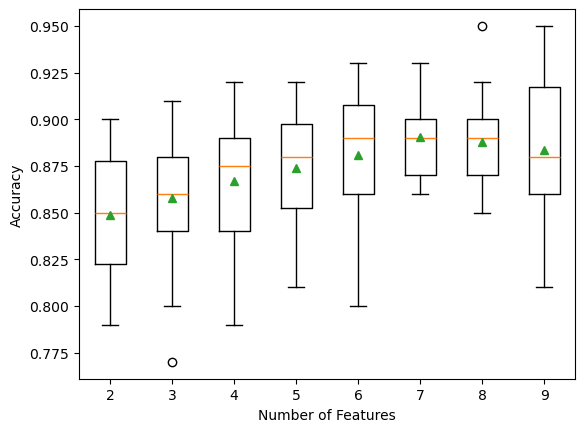

In [8]:
# Importing the necessary plotting module (assuming it's already imported)

# Plotting a boxplot to compare the performance of different models
# 'results' contains the performance data (e.g., accuracy scores, etc.) for each model
# 'names' is a list of the model names corresponding to the performance results
# The 'boxplot' function is used to generate a boxplot to compare the performance visually
pyplot.boxplot(results, showmeans=True)  # Create the boxplot and display means on each box

# Add x-axis and y-axis labels
pyplot.xlabel("Number of Features")
pyplot.ylabel("Accuracy")

# Set the x-axis labels using 'xticklabels' (for model names corresponding to each boxplot)
pyplot.xticks(ticks=range(1, len(names) + 1), labels=names)  # Set model names as x-axis labels

# Display the plot to the user
pyplot.show()  # Show the generated plot

This box plot illustrates the relationship between the number of features used in a model and the resulting accuracy scores. The x-axis represents the number of features selected, ranging from 2 to 9, while the y-axis shows the corresponding accuracy scores, which fall between approximately 0.775 and 0.950. For each feature count, a box plot summarizes the distribution of accuracy scores, providing insights into the model's performance variability.

Each box represents the interquartile range (IQR), capturing the middle 50% of the accuracy values. The orange horizontal line inside each box marks the median accuracy, while the green triangle likely indicates the mean. The whiskers extend to the minimum and maximum values that are not considered outliers, and any outliers are shown as individual points outside the whiskers.

From the plot, it is evident that as the number of features increases, both the median and mean accuracies tend to rise, particularly between 2 and 6 features. This trend suggests that including more features initially improves model performance. However, after about 6 features, the gains in accuracy become less consistent. For instance, although the median accuracy remains high from 6 to 9 features, the variability in performance also increases slightly in some cases, and the presence of outliers becomes more noticeable.

Overall, this plot implies that model accuracy improves with the addition of features up to a certain point, beyond which the benefit plateaus or introduces greater variability. A feature count around 6 to 7 appears to offer a good trade-off between accuracy and stability, indicating a potentially optimal range for model performance.

### Automatically Select the Number of Features

To automate the selection of optimal features, we can leverage **RFECV (Recursive Feature Elimination with Cross-Validation)**, which systematically evaluates feature subsets of varying sizes through cross-validation. This method extends the standard RFE approach by dynamically identifying the number of features that yield the highest mean performance score across validation folds. By iteratively removing the least important features and assessing model accuracy at each step, RFECV eliminates the need for manual threshold-setting while ensuring robust feature selection. As demonstrated in our prior analysis, this data-driven approach balances model complexity and predictive power by selecting only the most contributive features, mitigating overfitting risks inherent in high-dimensional datasets.

In [9]:
# Automatically select the number of features for Recursive Feature Elimination (RFE) using cross-validation

# Define the dataset for classification
# 'X' are the features, 'y' is the target variable
# make_classification generates a synthetic classification dataset
X, y = make_classification(
    n_samples=1000,  # Number of samples in the dataset
    n_features=10,   # Total number of features
    n_informative=5, # Number of informative features (actually useful for prediction)
    n_redundant=5,   # Number of redundant features (linear combinations of the informative ones)
    random_state=1   # Random seed for reproducibility
)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
# - estimator: The model used to evaluate feature importance (DecisionTreeClassifier in this case).
# - RFECV automatically selects the optimal number of features by cross-validating different feature subsets.
rfe = RFECV(estimator=DecisionTreeClassifier(random_state=42))

# Initialize a DecisionTreeClassifier model
# - This model will be used for classification after feature selection.
model = DecisionTreeClassifier(random_state=42)

# Create a pipeline to streamline the workflow
# - steps: A list of tuples defining the sequence of operations:
#   - "s": RFECV for feature selection.
#   - "m": DecisionTreeClassifier for classification.
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])

# Evaluate the model performance using cross-validation
# RepeatedStratifiedKFold splits the dataset into 10 folds and repeats 3 times for more reliable results
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform cross-validation using the pipeline, scoring by accuracy, and running in parallel with n_jobs=-1
n_scores = cross_val_score(pipeline, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

# Report the mean and standard deviation of accuracy from the cross-validation results
print("Accuracy: %.3f (%.3f)" % (mean(n_scores), std(n_scores)))  # Display average accuracy and its variation

Accuracy: 0.889 (0.028)


The Recursive Feature Elimination (RFE) pipeline, which leverages a decision tree model for both feature selection and final classification, demonstrates strong performance with an accuracy of 89%. This two-stage approach—first automatically identifying the optimal feature subset through RFE, then training a decision tree on these selected features—effectively balances dimensionality reduction with predictive power. The high accuracy suggests that the method successfully retains the most discriminative features while eliminating noise or redundancy in the input space. Notably, this performance is achieved without manual feature selection, highlighting the utility of automated wrapper methods for model optimization.

### Which Features Were Selected

When performing Recursive Feature Elimination (RFE), it is critical to examine the final feature selection outcomes. The fitted RFE or RFECV object provides two key attributes for this analysis:
* support_: A Boolean mask (True/False) indicating which features (ordered by column index) were retained.
* ranking_: An array of integers representing the relative importance ranking of all features (where 1 denotes selected features and higher numbers indicate elimination order).

For example, applying RFE to select the top 5 features from a 10-column dataset would yield:
* Column indices (0 to 9) mapped to their selection status (True if among the top 5).
* Rankings showing the elimination sequence (e.g., [3, 1, 2, 1, 1, 4, 1, 5, 1, 6] where 1 marks the 5 best features).

This transparency enables precise interpretation of feature importance and supports validation of the selection process.

In [10]:
# Report which features were selected by RFE (Recursive Feature Elimination)

# Define the dataset
# 'X' is the feature matrix, and 'y' is the target variable
# Using 'make_classification' to generate a synthetic dataset with 1000 samples and 10 features
# 5 informative features and 5 redundant features are used
X, y = make_classification(
    n_samples=1000,  # number of samples
    n_features=10,   # total number of features
    n_informative=5, # number of informative features
    n_redundant=5,   # number of redundant features
    random_state=1   # for reproducibility
)

# Define the RFE (Recursive Feature Elimination) model
# 'estimator' is the model used to evaluate the feature importance (here a DecisionTreeClassifier)
# 'n_features_to_select' specifies how many features should be selected
rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=5)

# Fit RFE on the dataset
# This will eliminate irrelevant features and rank the remaining features
rfe.fit(X, y)

# Summarize the selected features and their ranks
# 'rfe.support_' indicates which features are selected (True/False)
# 'rfe.ranking_' shows the ranking of all features (1 means the most important feature)
for i in range(X.shape[1]):
    print("Column: %d, Selected=%s, Rank: %d" % (i, rfe.support_[i], rfe.ranking_[i]))
    # Print the index of the feature, whether it's selected (True/False), and its ranking

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 6
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 5
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 3
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 2


### Explore Estimator Algorithm

The RFE algorithm's flexibility allows integration with any predictive model that generates feature importance scores, though the specific selection results may vary across algorithms. While most decision-tree-based methods (e.g., Random Forests, Gradient Boosted Trees) typically yield similar feature importance trends, subtle differences can emerge due to their distinct splitting criteria and regularization approaches. To ensure robust feature selection, practitioners should empirically evaluate multiple algorithms through systematic comparison - for instance, testing both linear models (like Logistic Regression with coefficient magnitudes) and non-linear tree-based approaches within the RFE framework. The following example illustrates this exploratory process by wrapping different estimators in RFE and comparing their selected feature subsets, which may reveal algorithm-dependent biases or reinforce consensus features.

In [11]:
# Explore the algorithm wrapped by RFE

# Function to generate a dataset for classification
def get_dataset():
    # Create a synthetic classification dataset with 1000 samples, 10 features, 5 informative and 5 redundant features
    X, y = make_classification(
        n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1
    )
    # Return the features (X) and labels (y)
    return X, y  

# Function to create a dictionary of models wrapped with RFE (Recursive Feature Elimination)
def get_models():
    # Initialize an empty dictionary to store models
    models = {}  

    # Logistic Regression (lr)
    # Initialize Recursive Feature Elimination (RFE)
    # - estimator: The model used to evaluate feature importance (LogisticRegression in this case).
    # - n_features_to_select: The number of features to retain (5 in this case).
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    
    # Initialize a DecisionTreeClassifier model
    # - This model will be used for classification after feature selection.
    model = DecisionTreeClassifier(random_state=42)
    
    # Create a pipeline and store it in a dictionary
    # - steps: A list of tuples defining the sequence of operations:
    #   - "s": RFE for feature selection.
    #   - "m": DecisionTreeClassifier for classification.
    # - The pipeline is stored in the dictionary `models` with the key "lr".
    models["lr"] = Pipeline(steps=[("s", rfe), ("m", model)])

    # Perceptron (per)
    # Initialize Recursive Feature Elimination (RFE)
    # - estimator: The model used to evaluate feature importance (Perceptron in this case).
    # - n_features_to_select: The number of features to retain (5 in this case).
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)

    # Initialize a DecisionTreeClassifier model
    # - This model will be used for classification after feature selection.
    model = DecisionTreeClassifier(random_state=42)

    # Create a pipeline and store it in a dictionary
    # - steps: A list of tuples defining the sequence of operations:
    #   - "s": RFE for feature selection.
    #   - "m": DecisionTreeClassifier for classification.
    # - The pipeline is stored in the dictionary `models` with the key "per".
    models["per"] = Pipeline(steps=[("s", rfe), ("m", model)])

    # Decision Tree Classifier (dtc)
    # Initialize Recursive Feature Elimination (RFE)
    # - estimator: The model used to evaluate feature importance (DecisionTreeClassifier in this case).
    # - n_features_to_select: The number of features to retain (5 in this case).
    rfe = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=5)

    # Initialize a DecisionTreeClassifier model
    # - This model will be used for classification after feature selection.
    model = DecisionTreeClassifier(random_state=42)  

    # Create a pipeline and store it in a dictionary
    # - steps: A list of tuples defining the sequence of operations:
    #   - "s": RFE for feature selection.
    #   - "m": DecisionTreeClassifier for classification.
    # - The pipeline is stored in the dictionary `models` with the key "dtc".
    models["dtc"] = Pipeline(steps=[("s", rfe), ("m", model)])

    # Random Forest Classifier (rf)
    # Initialize Recursive Feature Elimination (RFE)
    # - estimator: The model used to evaluate feature importance (RandomForestClassifier in this case).
    # - n_features_to_select: The number of features to retain (5 in this case).
    rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

    # Initialize a DecisionTreeClassifier model
    # - This model will be used for classification after feature selection.
    model = DecisionTreeClassifier(random_state=42)

    # Create a pipeline and store it in a dictionary
    # - steps: A list of tuples defining the sequence of operations:
    #   - "s": RFE for feature selection.
    #   - "m": DecisionTreeClassifier for classification.
    # - The pipeline is stored in the dictionary `models` with the key "rf".
    models["rf"] = Pipeline(steps=[("s", rfe), ("m", model)])

    # Gradient Boosting Classifier (gbm)
    # Initialize Recursive Feature Elimination (RFE)
    # - estimator: The model used to evaluate feature importance (GradientBoostingClassifier in this case).
    # - n_features_to_select: The number of features to retain (5 in this case).
    rfe = RFE(estimator=GradientBoostingClassifier(random_state=42), n_features_to_select=5)

    # Initialize a DecisionTreeClassifier model
    # - This model will be used for classification after feature selection.
    model = DecisionTreeClassifier(random_state=42)

    # Create a pipeline and store it in a dictionary
    # - steps: A list of tuples defining the sequence of operations:
    #   - "s": RFE for feature selection.
    #   - "m": DecisionTreeClassifier for classification.
    # - The pipeline is stored in the dictionary `models` with the key "gbm".
    models["gbm"] = Pipeline(steps=[("s", rfe), ("m", model)])

    # Return the dictionary containing models with RFE
    return models  


# Function to evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # Define cross-validation strategy: StratifiedKFold with 10 splits and 3 repeats
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    # Perform cross-validation and calculate accuracy scores
    scores = cross_val_score(model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

    # Return the accuracy scores
    return scores  


# Define the dataset by calling the function get_dataset
X, y = get_dataset()

# Get the models to evaluate by calling get_models
models = get_models()

# Initialize lists to store results and model names
results, names = [], []

# Loop through each model in the models dictionary
for name, model in models.items():
    # Evaluate each model using cross-validation and store the results
    scores = evaluate_model(model, X, y)

    # Append the scores for this model
    results.append(scores)

    # Append the model name
    names.append(name)
    
    # Print the model name, mean accuracy, and standard deviation of the accuracy scores
    print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))  # Print the results

>lr 0.882 (0.035)
>per 0.854 (0.040)
>dtc 0.879 (0.036)
>rf 0.859 (0.034)
>gbm 0.879 (0.036)


The model performance metrics reveal that logistic regression (LR) achieved the highest mean accuracy of 0.882 (±0.035), followed closely by gradient boosting machine (GBM) at 0.879 (±0.036) and decision tree classifier (DTC) at 0.879 (±0.036). While all algorithms demonstrated strong performance, the superior and more consistent results from linear logistic regression (compared to the tree-based methods: random forest at 0.859±0.034 and perceptron at 0.854±0.040) suggest that its feature selection capabilities may be more reliable for this particular dataset. The narrow standard deviations across all models indicate stable performance, but logistic regression's combination of highest mean accuracy and competitive variability makes it particularly noteworthy. These results imply that linear methods may be better suited for feature selection tasks when working with data of this nature, though the strong showing from gradient boosting warrants further investigation into ensemble approaches.

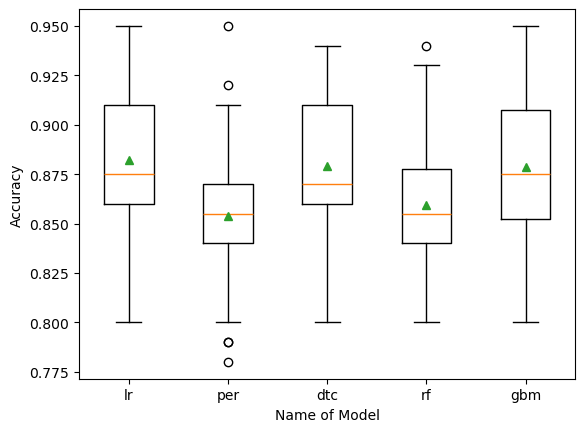

In [12]:
# Importing the necessary plotting module (assuming it's already imported)

# Plotting a boxplot to compare the performance of different models
# 'results' contains the performance data (e.g., accuracy scores, etc.) for each model
# 'names' is a list of the model names corresponding to the performance results
# The 'boxplot' function is used to generate a boxplot to compare the performance visually
pyplot.boxplot(results, showmeans=True)  # Create the boxplot and display means on each box

# Add x-axis and y-axis labels
pyplot.xlabel("Name of Model")
pyplot.ylabel("Accuracy")

# Set the x-axis labels using 'xticklabels' (for model names corresponding to each boxplot)
pyplot.xticks(ticks=range(1, len(names) + 1), labels=names)  # Set model names as x-axis labels

# Display the plot to the user
pyplot.show()  # Show the generated plot


This box plot compares the accuracy of different machine learning models, with the x-axis representing the names of the models and the y-axis showing their corresponding mean accuracy scores. The models being compared include Logistic Regression (lr), Perceptron (per), Decision Tree Classifier (dtc), Random Forest (rf), and Gradient Boosting Machine (gbm). Each box plot captures the distribution of mean accuracy values across multiple runs of the models, providing insights into their performance stability and effectiveness.

The central orange line inside each box represents the median accuracy, while the green triangle indicates the mean accuracy. The boxes themselves depict the interquartile range (IQR), which encompasses the middle 50% of the accuracy values. The whiskers extend to the minimum and maximum values within a certain range, excluding any outliers, which appear as small circles beyond the whiskers.

Logistic Regression and Gradient Boosting Machine demonstrate the highest median and mean accuracy among all the models, suggesting they consistently perform well. In contrast, the Perceptron model has the lowest median accuracy and exhibits a noticeable outlier, indicating that its performance is less stable compared to the others. The Decision Tree Classifier and Random Forest models show similar median accuracies, but Random Forest appears to be slightly more consistent with a more compact distribution.

Another important observation is the variability in model performance. Logistic Regression and Gradient Boosting have higher upper whiskers, indicating that these models have the potential to achieve strong accuracy scores in some cases. The Perceptron model, on the other hand, has a wider spread and a lower outlier, reinforcing its inconsistency. Random Forest appears to have a relatively stable performance with fewer extreme values, making it a reliable option.

In conclusion, Logistic Regression and Gradient Boosting seem to be the most effective models in terms of both median and mean accuracy. Perceptron performs the weakest, showing lower accuracy and higher variation across runs. If stability and high performance are the main objectives, Gradient Boosting or Random Forest would likely be the best choices.

## Conclusion

Through this tutorial, we learned how to effectively use Recursive Feature Elimination for feature selection in both classification and regression problems. We explored key hyperparameters like the number of features to select and the choice of wrapped algorithm. The techniques covered demonstrate how RFE can be used to identify the most relevant features for predictive modeling tasks.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the tutorial.